In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
User ID            400 non-null int64
Gender             400 non-null object
Age                400 non-null int64
EstimatedSalary    400 non-null int64
Purchased          400 non-null int64
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


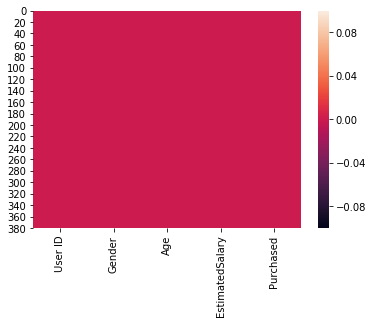

In [4]:
sns.heatmap(df.isnull())

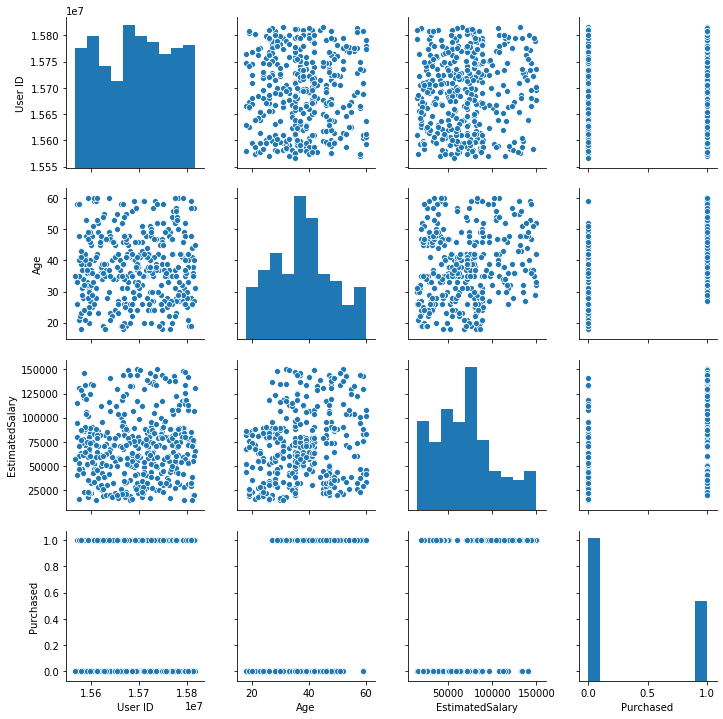

In [5]:
sns.pairplot(df)

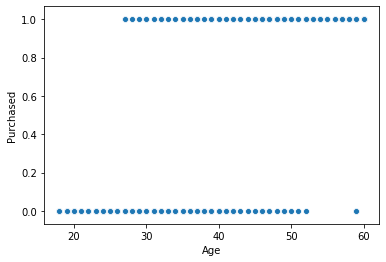

In [6]:
sns.scatterplot(data=df,x='Age',y='Purchased')

In [7]:
df.drop(['User ID'],axis=1,inplace=True)

In [8]:
sex=pd.get_dummies(df['Gender'],drop_first=True)
sex.head()

,Male
0,1
1,1
2,0
3,0
4,1


In [9]:
df=pd.concat([df,sex],axis=1)
df.head()

,Gender,Age,EstimatedSalary,Purchased,Male
0,Male,19,19000,0,1
1,Male,35,20000,0,1
2,Female,26,43000,0,0
3,Female,27,57000,0,0
4,Male,19,76000,0,1


In [10]:
df.drop('Gender',axis=1,inplace=True)

In [11]:
df.head()

,Age,EstimatedSalary,Purchased,Male
0,19,19000,0,1
1,35,20000,0,1
2,26,43000,0,0
3,27,57000,0,0
4,19,76000,0,1


In [12]:
X=df.drop('Purchased',axis=1)
y=df.Purchased

In [13]:
X,y

(     Age  EstimatedSalary  Male
 0     19            19000     1
 1     35            20000     1
 2     26            43000     0
 3     27            57000     0
 4     19            76000     1
 ..   ...              ...   ...
 395   46            41000     0
 396   51            23000     1
 397   50            20000     0
 398   36            33000     1
 399   49            36000     0
 
 [400 rows x 3 columns], 0      0
 1      0
 2      0
 3      0
 4      0
       ..
 395    1
 396    1
 397    1
 398    0
 399    1
 Name: Purchased, Length: 400, dtype: int64)

In [14]:
y.value_counts()

0    257
1    143
Name: Purchased, dtype: int64

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [17]:
from sklearn.linear_model import LogisticRegression

In [18]:
model=LogisticRegression()

In [19]:
model.fit(X_train, y_train)

C:\Users\sunny vybhav\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [28]:
y_train.value_counts()

0    177
1     91
Name: Purchased, dtype: int64

In [19]:
X_train

,Age,EstimatedSalary,Male
258,58,95000,0
177,25,22000,1
119,41,59000,1
194,28,89000,1
229,42,80000,0
...,...,...,...
71,24,27000,0
106,26,35000,0
270,43,133000,0
348,39,77000,1


In [20]:
from sklearn.metrics import classification_report

In [31]:
print(classification_report(y_train,model.predict()))

              precision    recall  f1-score   support

           0       0.66      1.00      0.80       177
           1       0.00      0.00      0.00        91

    accuracy                           0.66       268
   macro avg       0.33      0.50      0.40       268
weighted avg       0.44      0.66      0.53       268



C:\Users\sunny vybhav\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [22]:
from sklearn.metrics import confusion_matrix

In [23]:
confusion_matrix(y_train,model.predict(X_train))

array([[177,   0],
       [ 91,   0]], dtype=int64)

In [24]:
from sklearn.metrics import accuracy_score

In [25]:
accuracy_score(y_train,model.predict(X_train))

0.6604477611940298